In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
X = np.load('Data/X.npy')
Y = np.load('Data/Y.npy')
print(X.shape,Y.shape)

(100, 2) (100,)


In [36]:
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [11]:
#Data Visualisation
a = np.array([1,2,3,4])
b = a**2

print(a,b)

[1 2 3 4] [ 1  4  9 16]


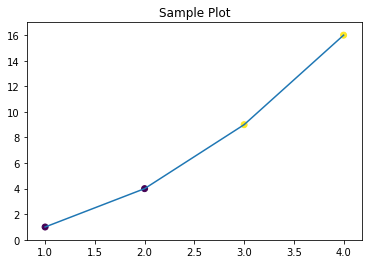

In [37]:
# Plot gives you line
plt.plot(a,b)
# Scatter gives you points
plt.scatter(a,b,c=[0,0,1,1])
plt.title("Sample Plot")
plt.show()

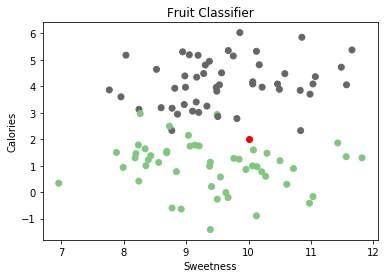

In [41]:
x1 = X[ : ,0]
x2 = X[ : ,1]

test_fruit = np.array([10,2])

plt.scatter(x1,x2,c=Y,cmap=plt.cm.Accent)
plt.scatter(test_fruit[0],test_fruit[1],color='red')
plt.title("Fruit Classifier")
plt.xlabel("Sweetness")
plt.ylabel("Calories")
plt.show()

In [48]:
def dist(a,b):
    return np.sum((a-b)**2)**.5    

In [72]:
def knn(X,Y,test_point,k=5):
    
    # 1 Step - Find dist of test_point from all points
    d = []
    m = X.shape[0]
    
    for i in range(m):
        current_dis = dist(X[i],test_point)
        d.append((current_dis,Y[i]))
    
    # Sort
    d.sort()
    
    # Take the first k elements after sorting (slicing)
    d = np.array(d[0:k])
    d = d[:,1]
    uniq,occ = np.unique(d,return_counts=True)
    print(uniq,occ)
    idx = np.argmax(occ)
    pred = uniq[idx]
    
    return int(pred)

In [73]:
knn(X,Y,test_fruit)

[0. 1.] [4 1]


0

In [74]:
import pandas as pd

In [80]:
df = pd.read_csv('DigitsData/train.csv',header=None)

In [94]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [83]:
df.head()


ds = df.values


In [100]:
first_row = ds[0]

print(first_row.shape)
pixel_values = first_row[ :-1]
label = first_row[-1]

pixel_values = pixel_values.reshape((28,28))
print(pixel_values.shape)
print(label)

(785,)
(28, 28)
7


Text(0.5, 1.0, 'Label 7')

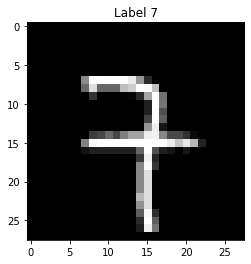

In [105]:
plt.imshow(pixel_values,cmap='gray')
plt.title("Label "+str(label))

In [101]:
a = np.array([1,2,3,4,5,5,6,6,6,9])
a = a.reshape((2,5))
a = a.reshape((10,))
print(a)
print(a.shape)

[1 2 3 4 5 5 6 6 6 9]
(10,)


In [106]:
## Digit Recognition

In [116]:
df2 = pd.read_csv("DigitsData/test.csv",header=None)
test_data = df2.values

X_test = test_data[:,:-1]
Y_test = test_data[:,-1]

In [117]:
X_Train = ds[:, :-1]
Y_Train = ds[: ,-1]


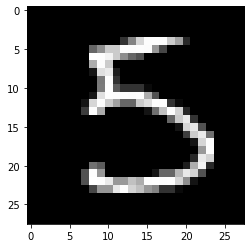

In [128]:
test_point = X_test[15]
plt.imshow(test_point.reshape(28,28),cmap='gray')

In [129]:
knn(X_Train,Y_Train,test_point)

[3. 5.] [2 3]


5